In [1]:
import tensorflow
import tensorflow.keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import chi2_contingency
import scipy.stats as stats

In [2]:
df = pd.read_csv("ML_proj-local/stu_dropout.csv", sep=";")

## EDA

In [9]:
df.shape

(4424, 37)

In [ ]:
df.head(10)

In [ ]:
df.columns

In [3]:
df.columns = [col.lower().replace(" ", "_") for col in df.columns]  # cleaner col names

In [4]:
df.dtypes

marital_status                                      int64
application_mode                                    int64
application_order                                   int64
course                                              int64
daytime/evening_attendance\t                        int64
previous_qualification                              int64
previous_qualification_(grade)                    float64
nacionality                                         int64
mother's_qualification                              int64
father's_qualification                              int64
mother's_occupation                                 int64
father's_occupation                                 int64
admission_grade                                   float64
displaced                                           int64
educational_special_needs                           int64
debtor                                              int64
tuition_fees_up_to_date                             int64
gender        

In [8]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

In [5]:
df['course'].value_counts()

course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64

In [ ]:
# so far we know that we need to change column types (one hot encoding and more).
# Before that, we can run basic statistical tests to gain more understanding.

In [ ]:
df["father's_occupation"].value_counts()

### Basic statistical tests

In [7]:
contingency = pd.crosstab(df["marital_status"], df["target"])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Chi-square test p-value:", p)

# p value is less than 0.05 significance level
# so it means the relationship between marital_status and target is significant.

Chi-square test p-value: 8.054279703889306e-10


In [8]:
groups = [df[df["target"] == cat]["previous_qualification_(grade)"].dropna()
          for cat in df["target"].unique()]
f, p = stats.f_oneway(*groups)
print("ANOVA p-value:", p)

# Since p-value is <0.05 we can say that at least one target group has different mean grade value than others.

ANOVA p-value: 1.0777825583187265e-12


### Visualizations

/var/folders/0v/csq0yj4973n1j6g1r8pck_0m0000gn/T/ipykernel_67133/3558614359.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Single", "Married", "Widower", "Divorced", "Union", "Separated"])


[Text(0, 0, 'Single'),
 Text(1, 0, 'Married'),
 Text(2, 0, 'Widower'),
 Text(3, 0, 'Divorced'),
 Text(4, 0, 'Union'),
 Text(5, 0, 'Separated')]

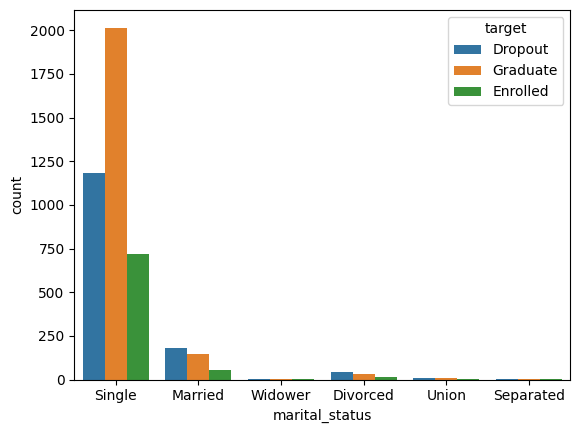

In [21]:
ax = sns.countplot(data=df, x='marital_status', hue='target')
ax.set_xticklabels(["Single", "Married", "Widower", "Divorced", "Union", "Separated"])

# most of the students are single, so all three levels are in single category mostly.
# besides that point, it's not as informative. 
# One small thing to note is that Married group has more dropouts than graduates and enrolled in it. 

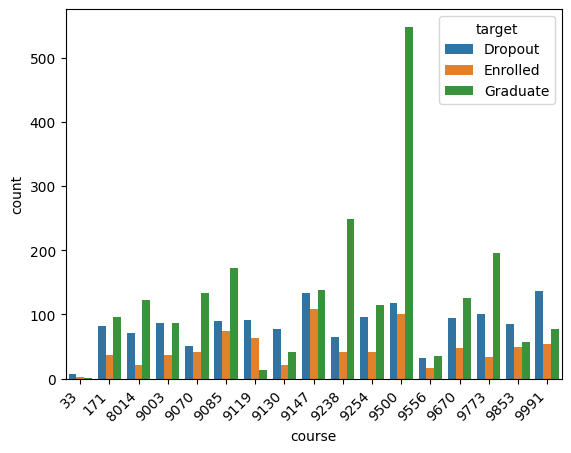

In [24]:
ax = sns.countplot(data=df, x='course', hue='target')
plt.xticks(rotation=45, ha='right')   
plt.show()

# main aim was to see which course has more dropouts in general.
# But dropout rate seems to be uniform.

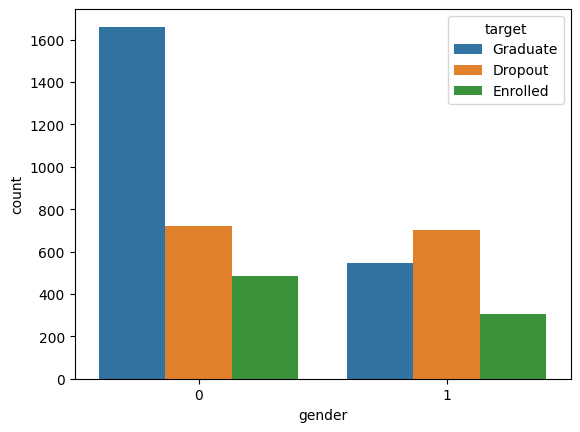

In [28]:
ax = sns.countplot(data = df, x='gender', hue = 'target')
# ax = sns.countplot(data = df, x='gender')